对预处理的中英文文本进行统计分析，包括计算在收集样本上英语字母和单词或汉字的概率和熵，并利用收集的英文文本验证齐夫定律(Zipf’s law)，分析过程中设置3%、9%、33%和100%的文本量，观察不同文本量对结果的影响，同时在分析过程中绘制相应的图表进行展示。

In [1]:
# 库导入
import numpy as np
import pandas as pd
import collections as ct
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
'''分别为中文和英文设计不同的文本处理函数，对于中文直接对汉字进行相关的统计分析，而对于英文则分别进行字母和单词的统计分析，此外还有用于计算熵的函数。'''

# 中文文本处理函数
def zh_process(text):
    character_counts = ct.Counter(text)
    character_counts.pop(' ', None)
    character_stats = pd.DataFrame(
        character_counts.items(), 
        columns=['character', 'count']
    )   # 构造一个DataFrame，包含汉字及其计数，df形式方便后续分析与作图
    total_characters = character_stats['count'].sum()   # 统计总汉字数
    character_stats['prob'] = character_stats['count'] / total_characters   # 计算每个汉字的概率
    return character_stats, total_characters    # 返回包含汉字、计数、概率和熵的DataFrame以及语料总汉字数

# 英文文本处理函数
def en_process(text):
    text = text.lower() # 先统一转换为小写字母
    letter_counts = ct.Counter(c for c in text if c.isalpha())  # 统计字母
    word_counts = ct.Counter(text.split())  # 统计单词
    letter_stats = pd.DataFrame(
        letter_counts.items(),
        columns=['letter', 'count']
    )
    word_stats = pd.DataFrame(
        word_counts.items(),
        columns=['word', 'count']
    )   # 分别构造字母和单词的DataFrame
    total_letters = letter_stats['count'].sum()
    total_words = word_stats['count'].sum()
    letter_stats['prob'] = letter_stats['count'] / total_letters
    word_stats['prob'] = word_stats['count'] / total_words
    return letter_stats, word_stats, total_letters, total_words # 返回字母和单词的DataFrame及其总数

# 熵函数  
def calculate_entropy(dataframe):
    entropy = sum(-p * np.log2(p) for p in dataframe['prob'] if p > 0)
    return entropy

中文语料分析

In [3]:
zh_file_path = 'zh_wikipedia.txt'   # 设置文件路径
with open(zh_file_path, 'r', encoding='utf-8') as f:
    zh_text = f.read()

zh_stats, zh_count = zh_process(zh_text)
print(zh_count)
zh_entropy = calculate_entropy(zh_stats)
print(zh_entropy)
zh_stats = zh_stats.sort_values(by='count', ascending=False).reset_index(drop=True)
zh_stats.head(20)

8283290
9.831362556659824


,character,count,prob
0,的,238118,0.028747
1,年,109971,0.013276
2,在,77940,0.009409
3,为,77131,0.009312
4,一,72575,0.008762
5,国,68795,0.008305
6,中,65764,0.007939
7,是,61527,0.007428
8,人,61466,0.007420
9,于,53764,0.006491


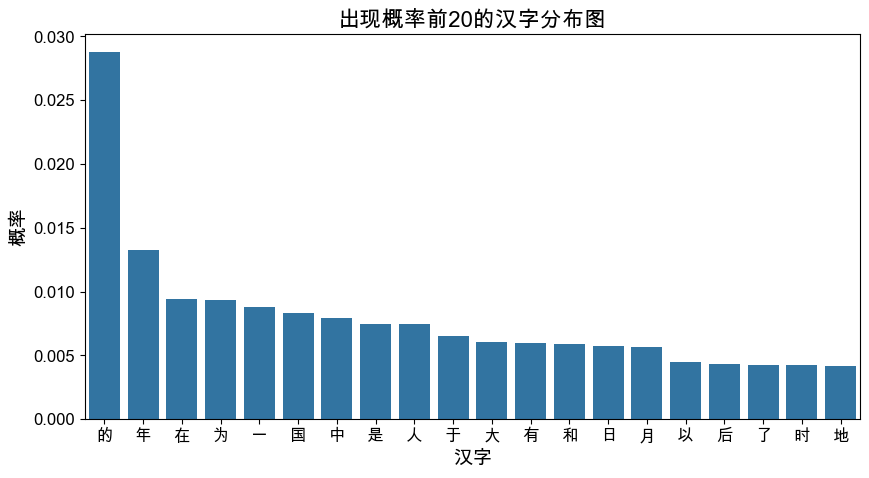

<Figure size 640x480 with 0 Axes>

In [7]:
# 绘制汉字概率分布图（前20个汉字）
plt.style.use('default')

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.barplot(x='character', y='prob', data=zh_stats.head(20))
plt.title('出现概率前20的汉字分布图', fontsize=16)
plt.xlabel('汉字', fontsize=14)
plt.ylabel('概率', fontsize=14)

plt.show()
plt.savefig('zh_top20_char_distribution.png', dpi=300)

英文语料分析

In [8]:
# 设置为3%，9%，33%和100%
en_file_path = 'en_wikipedia.txt'
with open(en_file_path, 'r', encoding='utf-8') as f:
    en_text_total = f.read()

words = en_text_total.split()
total_words = len(words)

words3 = words[:total_words//100*3]
words9 = words[:total_words//100*9]
words33 = words[:total_words//100*33]

en_text3 = ' '.join(words3)
en_text9 = ' '.join(words9)
en_text33 = ' '.join(words33)

In [9]:
# 先处理3%词量的语料

en_letter_stats3, en_word_stats3, en_letter_count3, en_word_count3= en_process(en_text3)
print(en_letter_count3, en_word_count3)

en_letter_entropy3 = calculate_entropy(en_letter_stats3)
en_word_entropy3 = calculate_entropy(en_word_stats3)
print(en_letter_entropy3, en_word_entropy3)

en_letter_stats3 = en_letter_stats3.sort_values(by='count', ascending=False).reset_index(drop=True)
en_word_stats3 = en_word_stats3.sort_values(by='count', ascending=False).reset_index(drop=True)

1257953 252915
4.178920082376319 10.593588697863236


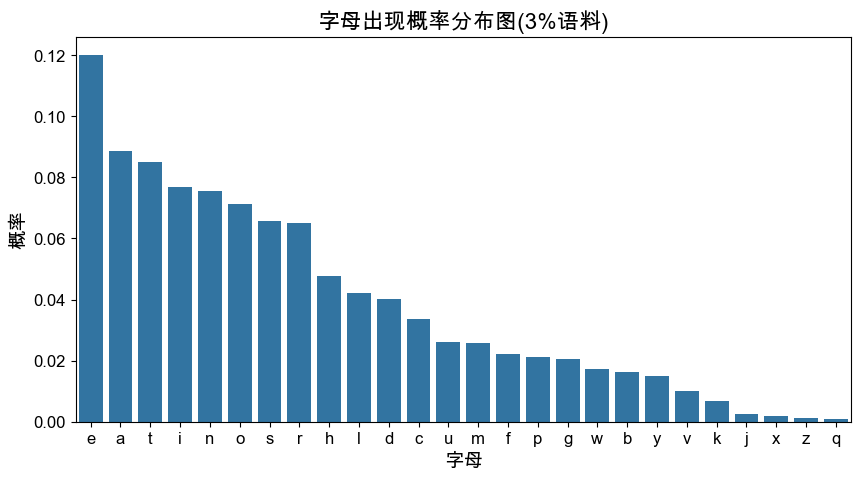

<Figure size 640x480 with 0 Axes>

In [10]:
# 绘图
plt.style.use('default')

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.barplot(x='letter', y='prob', data=en_letter_stats3)
plt.title('字母出现概率分布图(3%语料)', fontsize=16)
plt.xlabel('字母', fontsize=14)
plt.ylabel('概率', fontsize=14)

plt.show()
plt.savefig('en_letter_distribution3.png', dpi=300)

In [11]:
en_word_stats3.head(20)

,word,count,prob
0,the,19159,0.075753
1,of,8549,0.033802
2,in,7962,0.031481
3,and,7495,0.029634
4,a,5808,0.022964
5,to,5576,0.022047
6,was,3271,0.012933
7,is,2361,0.009335
8,as,2347,0.009280
9,for,2317,0.009161


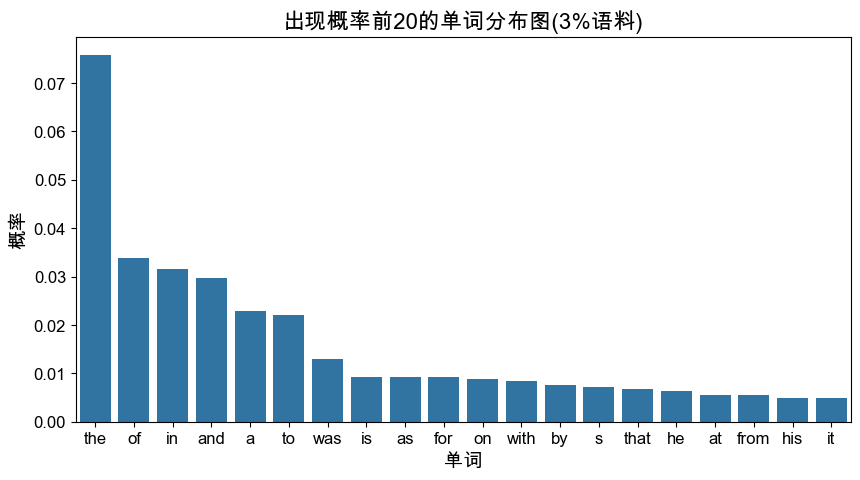

<Figure size 640x480 with 0 Axes>

In [12]:
# 绘图
plt.style.use('default')

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.barplot(x='word', y='prob', data=en_word_stats3.head(20))
plt.title('出现概率前20的单词分布图(3%语料)', fontsize=16)
plt.xlabel('单词', fontsize=14)
plt.ylabel('概率', fontsize=14)

plt.show()
plt.savefig('en_word_distribution3.png', dpi=300)

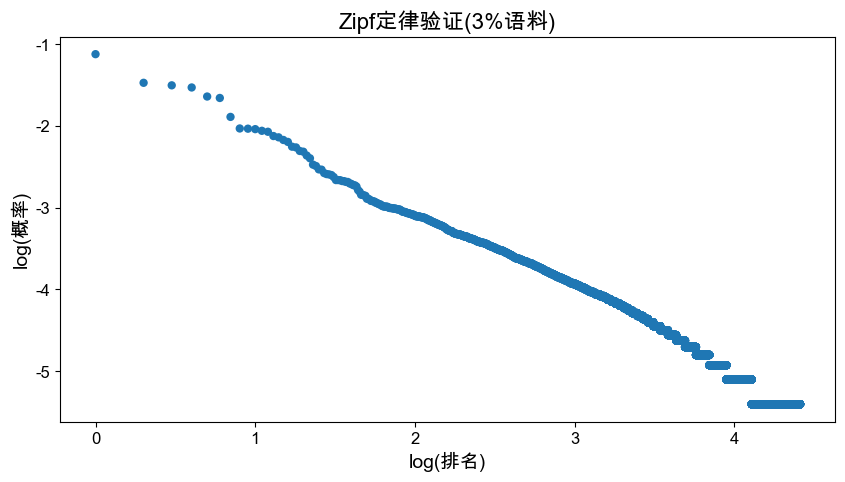

<Figure size 640x480 with 0 Axes>

In [13]:
# 利用单词验证zipf定律
# 通过绘制log-log图散点图以及进行线性拟合来验证zipf定律
rank3 = np.arange(1, len(en_word_stats3) + 1)
word_prob3 = en_word_stats3['prob'].values
log_rank3 = np.log10(rank3)
log_prob3 = np.log10(word_prob3)

plt.style.use('default')

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.scatterplot(x=log_rank3, y=log_prob3, edgecolor='none')

plt.title('Zipf定律验证(3%语料)', fontsize=16)
plt.xlabel('log(排名)', fontsize=14)
plt.ylabel('log(概率)', fontsize=14)

plt.show()
plt.savefig('en_zipf3.png', dpi=300)

In [14]:
# 进行线性拟合，输出拟合的结果
X3 = sm.add_constant(log_rank3)  # 添加常数项用于线性回归
y3 = log_prob3
model3 = sm.OLS(y3, X3)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 8.162e+05
Date:                Tue, 21 Oct 2025   Prob (F-statistic):               0.00
Time:                        18:50:22   Log-Likelihood:                 26702.
No. Observations:               25757   AIC:                        -5.340e+04
Df Residuals:                   25755   BIC:                        -5.338e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6121      0.005   -124.137      0.000      -0.622      -0.602
x1            -1.1136      0.001   -903.446      0.000      -1.116      -1.111
==============================================================================
Omnibus:                     2922.791   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4015.454
Skew:                          -0.951   Prob(JB):                         0.00
Kurtosis:                       3.352   Cond. No.                         39.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# 9%词量的语料

en_letter_stats9, en_word_stats9, en_letter_count9, en_word_count9= en_process(en_text9)
print(en_letter_count9, en_word_count9)

en_letter_entropy9 = calculate_entropy(en_letter_stats9)
en_word_entropy9 = calculate_entropy(en_word_stats9)
print(en_letter_entropy9, en_word_entropy9)

en_letter_stats9 = en_letter_stats9.sort_values(by='count', ascending=False).reset_index(drop=True)
en_word_stats9 = en_word_stats9.sort_values(by='count', ascending=False).reset_index(drop=True)

3769468 758745
4.178693444835341 10.811116740442476


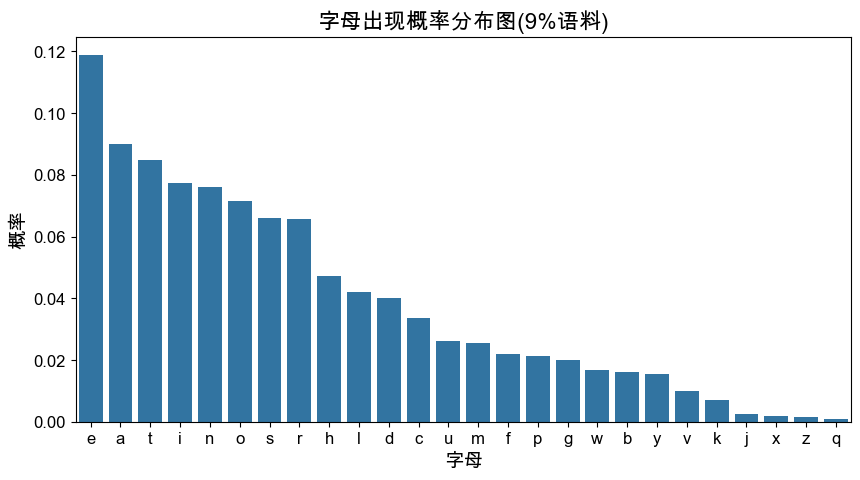

<Figure size 640x480 with 0 Axes>

In [16]:
plt.style.use('default')

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.barplot(x='letter', y='prob', data=en_letter_stats9)
plt.title('字母出现概率分布图(9%语料)', fontsize=16)
plt.xlabel('字母', fontsize=14)
plt.ylabel('概率', fontsize=14)

plt.show()
plt.savefig('en_letter_distribution9.png', dpi=300)

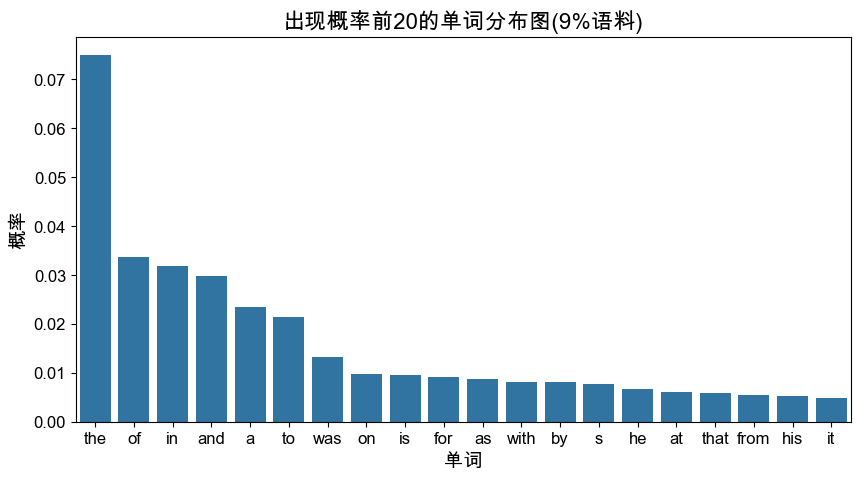

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.style.use('default')

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.barplot(x='word', y='prob', data=en_word_stats9.head(20))
plt.title('出现概率前20的单词分布图(9%语料)', fontsize=16)
plt.xlabel('单词', fontsize=14)
plt.ylabel('概率', fontsize=14)

plt.show()
plt.savefig('en_word_distribution9.png', dpi=300)

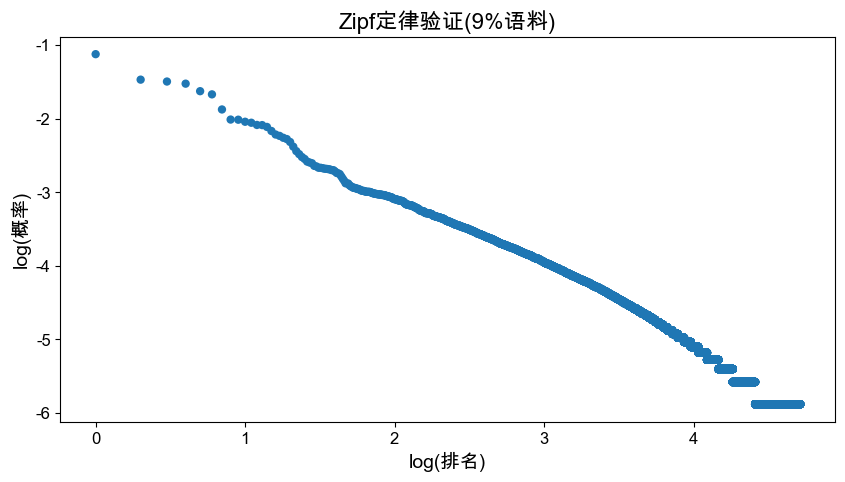

<Figure size 640x480 with 0 Axes>

In [18]:
rank9 = np.arange(1, len(en_word_stats9) + 1)
word_prob9 = en_word_stats9['prob'].values
log_rank9 = np.log10(rank9)
log_prob9 = np.log10(word_prob9)

plt.style.use('default')

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.scatterplot(x=log_rank9, y=log_prob9, edgecolor='none')

plt.title('Zipf定律验证(9%语料)', fontsize=16)
plt.xlabel('log(排名)', fontsize=14)
plt.ylabel('log(概率)', fontsize=14)

plt.show()
plt.savefig('en_zipf9.png', dpi=300)

In [19]:
X9 = sm.add_constant(log_rank9)
y9 = log_prob9
model9 = sm.OLS(y9, X9)
results9 = model9.fit()
results9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 1.715e+06
Date:                Tue, 21 Oct 2025   Prob (F-statistic):               0.00
Time:                        18:51:11   Log-Likelihood:                 50095.
No. Observations:               51705   AIC:                        -1.002e+05
Df Residuals:                   51703   BIC:                        -1.002e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2754      0.004    -68.814      0.000      -0.283      -0.268
x1            -1.2186      0.001  -1309.563      0.000      -1.220      -1.217
==============================================================================
Omnibus:                     8539.090   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15297.821
Skew:                          -1.061   Prob(JB):                         0.00
Kurtosis:                       4.613   Cond. No.                         44.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# 33%词量的语料

en_letter_stats33, en_word_stats33, en_letter_count33, en_word_count33= en_process(en_text33)
print(en_letter_count33, en_word_count33)

en_letter_entropy33 = calculate_entropy(en_letter_stats33)
en_word_entropy33 = calculate_entropy(en_word_stats33)
print(en_letter_entropy33, en_word_entropy33)

en_letter_stats33 = en_letter_stats33.sort_values(by='count', ascending=False).reset_index(drop=True)
en_word_stats33 = en_word_stats33.sort_values(by='count', ascending=False).reset_index(drop=True)

13815142 2782065
4.179883518561851 10.964765816567178


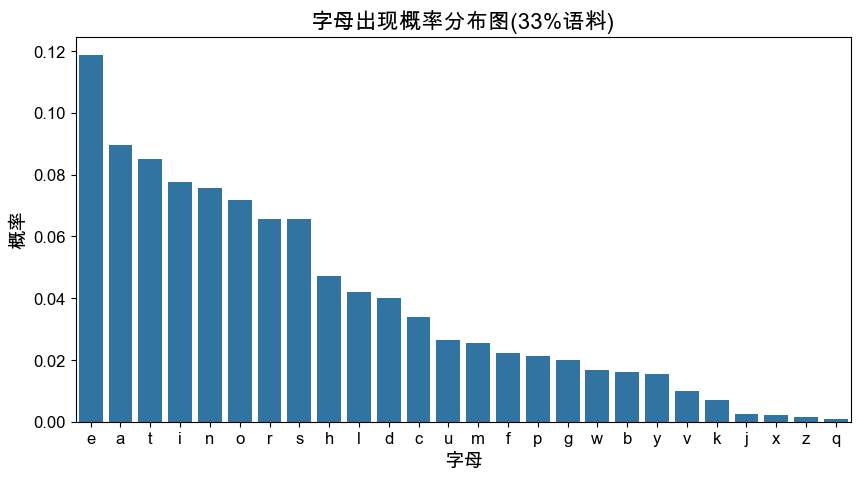

<Figure size 640x480 with 0 Axes>

In [21]:
plt.style.use('default')

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.barplot(x='letter', y='prob', data=en_letter_stats33)
plt.title('字母出现概率分布图(33%语料)', fontsize=16)
plt.xlabel('字母', fontsize=14)
plt.ylabel('概率', fontsize=14)

plt.show()
plt.savefig('en_letter_distribution33.png', dpi=300)

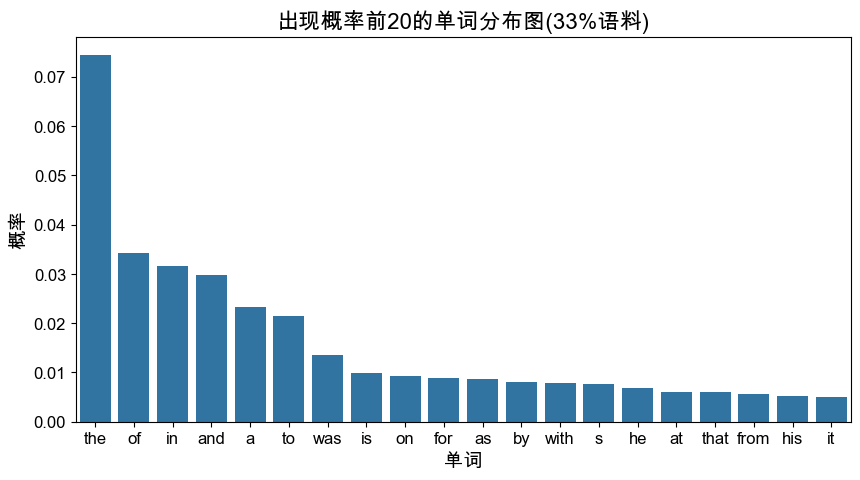

<Figure size 640x480 with 0 Axes>

In [22]:
plt.style.use('default')

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.barplot(x='word', y='prob', data=en_word_stats33.head(20))
plt.title('出现概率前20的单词分布图(33%语料)', fontsize=16)
plt.xlabel('单词', fontsize=14)
plt.ylabel('概率', fontsize=14)

plt.show()
plt.savefig('en_word_distribution33.png', dpi=300)

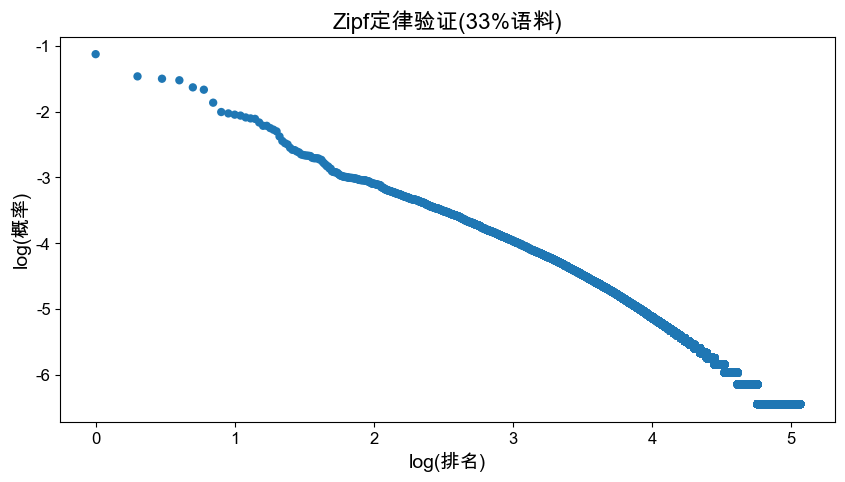

<Figure size 640x480 with 0 Axes>

In [24]:
rank33 = np.arange(1, len(en_word_stats33) + 1)
word_prob33 = en_word_stats33['prob'].values
log_rank33 = np.log10(rank33)
log_prob33 = np.log10(word_prob33)

plt.style.use('default')

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.scatterplot(x=log_rank33, y=log_prob33, edgecolor='none')

plt.title('Zipf定律验证(33%语料)', fontsize=16)
plt.xlabel('log(排名)', fontsize=14)
plt.ylabel('log(概率)', fontsize=14)

plt.show()
plt.savefig('en_zipf33.png', dpi=300)

In [25]:
X33 = sm.add_constant(log_rank33)
y33 = log_prob33
model33 = sm.OLS(y33, X33)
results33 = model33.fit()
results33.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 4.100e+06
Date:                Tue, 21 Oct 2025   Prob (F-statistic):               0.00
Time:                        19:00:04   Log-Likelihood:             1.0762e+05
No. Observations:              116463   AIC:                        -2.152e+05
Df Residuals:                  116461   BIC:                        -2.152e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0411      0.003     13.623      0.000       0.035       0.047
x1            -1.3125      0.001  -2024.763      0.000      -1.314      -1.311
==============================================================================
Omnibus:                    18967.552   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42425.919
Skew:                          -0.953   Prob(JB):                         0.00
Kurtosis:                       5.260   Cond. No.                         52.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# 全部100%词量的语料

en_letter_stats100, en_word_stats100, en_letter_count100, en_word_count100 = en_process(en_text_total)
print(en_letter_count100, en_word_count100)

en_letter_entropy100 = calculate_entropy(en_letter_stats100)
en_word_entropy100 = calculate_entropy(en_word_stats100)
print(en_letter_entropy100, en_word_entropy100)

en_letter_stats100 = en_letter_stats100.sort_values(by='count', ascending=False).reset_index(drop=True)
en_word_stats100 = en_word_stats100.sort_values(by='count', ascending=False).reset_index(drop=True)

41975253 8430554
4.179788158071513 11.064286075640508


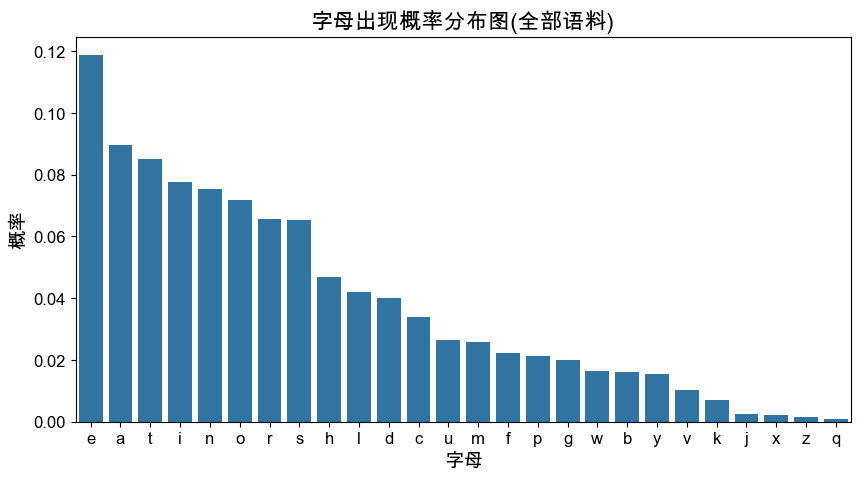

<Figure size 640x480 with 0 Axes>

In [30]:
plt.style.use('default')

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.barplot(x='letter', y='prob', data=en_letter_stats100)
plt.title('字母出现概率分布图(全部语料)', fontsize=16)
plt.xlabel('字母', fontsize=14)
plt.ylabel('概率', fontsize=14)

plt.show()
plt.savefig('en_letter_distribution100.png', dpi=300)

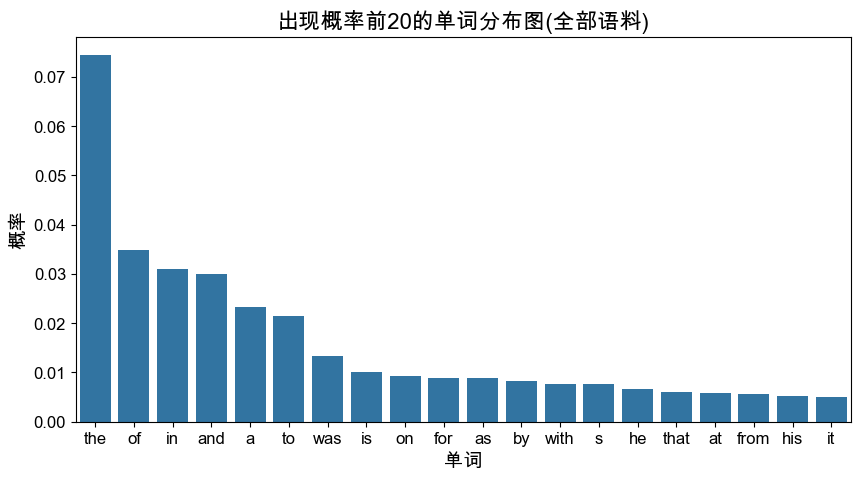

<Figure size 640x480 with 0 Axes>

In [31]:
plt.style.use('default')

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.barplot(x='word', y='prob', data=en_word_stats100.head(20))
plt.title('出现概率前20的单词分布图(全部语料)', fontsize=16)
plt.xlabel('单词', fontsize=14)
plt.ylabel('概率', fontsize=14)

plt.show()
plt.savefig('en_word_distribution100.png', dpi=300)

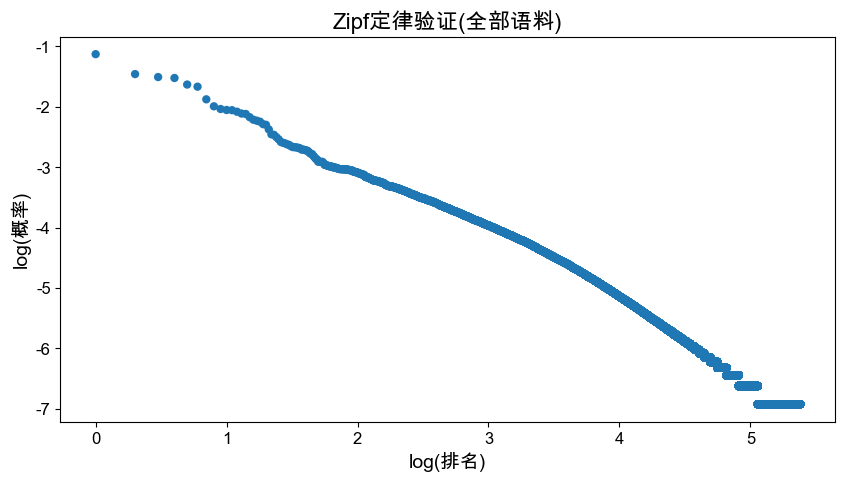

<Figure size 640x480 with 0 Axes>

In [32]:
rank100 = np.arange(1, len(en_word_stats100) + 1)
word_prob100 = en_word_stats100['prob'].values
log_rank100 = np.log10(rank100)
log_prob100 = np.log10(word_prob100)

plt.style.use('default')

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.scatterplot(x=log_rank100, y=log_prob100, edgecolor='none')

plt.title('Zipf定律验证(全部语料)', fontsize=16)
plt.xlabel('log(排名)', fontsize=14)
plt.ylabel('log(概率)', fontsize=14)

plt.show()
plt.savefig('en_zipf100.png', dpi=300)

In [33]:
X100 = sm.add_constant(log_rank100)
y100 = log_prob100
model100 = sm.OLS(y100, X100)
result100 = model100.fit()
result100.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 7.905e+06
Date:                Tue, 21 Oct 2025   Prob (F-statistic):               0.00
Time:                        19:13:31   Log-Likelihood:             2.0673e+05
No. Observations:              240096   AIC:                        -4.135e+05
Df Residuals:                  240094   BIC:                        -4.134e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1580      0.002     66.190      0.000       0.153       0.163
x1            -1.3517      0.000  -2811.571      0.000      -1.353      -1.351
==============================================================================
Omnibus:                    15551.559   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22011.596
Skew:                          -0.567   Prob(JB):                         0.00
Kurtosis:                       3.957   Cond. No.                         59.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""